# Problem Statement

The Telemarketing Team of a Bank runs campaigns to 
expand the term deposit portfolio. You are requested to 
enable prioritization for the Telemarketing team, so that 
overall responses and ROI of the campaign increases

In [2]:
#Term Deposit: Fixed Deposit

__Some Definitions First__
    - Marketing Channel : Avenue of communication to customer for Business Purpose
    - Telemarketing: It is a Marketing Channel where customers are called up for Offers
    - Portfolio: A group of customers under a product category
    - ROI : Acronym for Return on Investment

Data Source
    - This dataset is based on "Bank Marketing" UCI dataset
    - The full description along with dataset is available here : 
       http://archive.ics.uci.edu/ml/datasets/Bank+Marketing
    - This dataset is enriched with a few social and economic attributes
    - Due to confidentiality clauses all attributes are not mentioned
    - The binary classification goal is to predict if the client will subscribe a bank 
      term dep

# Importing Libraries

In [3]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Importing the Data for ML Project

In [4]:
df = pd.read_excel('bank_telemaketing.xlsx')

In [5]:
df.shape

(41188, 21)

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

# Setting Display options to ensure feature name visibility

In [8]:
#pd.set_option('display.max_columns',None)  #to make sure display doesn't show any warnings thrown at us

# Label the Target feature to 1/0

In [9]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [10]:
df['target']=np.where(df['y']=="yes",1,0)

In [11]:
df['target']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: target, Length: 41188, dtype: int32

# Drop the Target feature(y) to retain only Target 

In [12]:
df=df.drop(['y'],axis=1)

# Defining Target and Independent Features

In [13]:
Y=df[['target']]

X=df.drop(['target'],axis=1)

In [14]:
Y

,target
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


In [15]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


# Get the Event Rate

In [16]:
Y.mean()

target    0.112654
dtype: float64

# Split features into Numerical and Categorical

In [17]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

In [18]:
num.dtypes

age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [19]:
char.dtypes

job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
poutcome       object
dtype: object

In [20]:
# Counting unique values in features

def unique_levels(x):
    x=x.value_counts().count()
    return(x)
df_value_counts=pd.DataFrame(num.apply(lambda x : unique_levels(x)))
df_value_counts

,0
age,78
duration,1544
campaign,42
pdays,27
previous,8
emp.var.rate,10
cons.price.idx,26
cons.conf.idx,26
euribor3m,316
nr.employed,11


In [21]:
df_value_counts.columns=['feature_levels']
df_value_counts

,feature_levels
age,78
duration,1544
campaign,42
pdays,27
previous,8
emp.var.rate,10
cons.price.idx,26
cons.conf.idx,26
euribor3m,316
nr.employed,11


In [22]:
# slicing columns with feature_levels < 20 (since less unique values, hence can be put to categorical category

slice1=df_value_counts.loc[df_value_counts['feature_levels']<=20]
cat_list=slice1.index
cat=num.loc[:,cat_list]
cat.dtypes

previous          int64
emp.var.rate    float64
nr.employed     float64
dtype: object

In [23]:
# slicing columns with feature_levels > 20 to numerical

slice2=df_value_counts.loc[df_value_counts['feature_levels']>20]
num_list=slice2.index
num=num.loc[:,num_list]
num.dtypes

age                 int64
duration            int64
campaign            int64
pdays               int64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
dtype: object

In [24]:
# adding cat object to char
char=pd.concat([char,cat],axis=1,join="inner")

In [25]:
char.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,previous,emp.var.rate,nr.employed
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,0,1.1,5191.0
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,0,1.1,5191.0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,0,1.1,5191.0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,0,1.1,5191.0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,0,1.1,5191.0


In [26]:
num.head()

,age,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m
0,56,261,1,999,93.994,-36.4,4.857
1,57,149,1,999,93.994,-36.4,4.857
2,37,226,1,999,93.994,-36.4,4.857
3,40,151,1,999,93.994,-36.4,4.857
4,56,307,1,999,93.994,-36.4,4.857


# Outlier Analysis of Numerical Features

In [27]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,age,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,93.575664,-40.502600,3.621291
std,10.42125,259.279249,2.770014,186.910907,0.578840,4.628198,1.734447
min,17.00000,0.000000,1.000000,0.000000,92.201000,-50.800000,0.634000
1%,23.00000,11.000000,1.000000,3.000000,92.201000,-49.500000,0.658480
5%,26.00000,36.000000,1.000000,999.000000,92.713000,-47.100000,0.797000
10%,28.00000,59.000000,1.000000,999.000000,92.893000,-46.200000,1.046000
25%,32.00000,102.000000,1.000000,999.000000,93.075000,-42.700000,1.344000
50%,38.00000,180.000000,2.000000,999.000000,93.749000,-41.800000,4.857000
75%,47.00000,319.000000,3.000000,999.000000,93.994000,-36.400000,4.961000


# Capping and Flooring of outliers

In [28]:
# function to make min = 1% and max = 99%
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [29]:
num=num.apply(lambda x : outlier_cap(x))

In [30]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,age,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,39.976644,254.379784,2.500024,962.479290,93.574052,-40.495137,3.621394
std,10.138262,235.184174,2.301191,186.891194,0.576030,4.612905,1.734194
min,23.000000,11.000000,1.000000,3.000000,92.201000,-49.500000,0.658480
1%,23.000000,11.000000,1.000000,3.000000,92.201000,-49.500000,0.658932
5%,26.000000,36.000000,1.000000,999.000000,92.713000,-47.100000,0.797000
10%,28.000000,59.000000,1.000000,999.000000,92.893000,-46.200000,1.046000
25%,32.000000,102.000000,1.000000,999.000000,93.075000,-42.700000,1.344000
50%,38.000000,180.000000,2.000000,999.000000,93.749000,-41.800000,4.857000
75%,47.000000,319.000000,3.000000,999.000000,93.994000,-36.400000,4.961000


# Missing Value Analysis

In [31]:
num.isnull().mean()

age               0.0
duration          0.0
campaign          0.0
pdays             0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
dtype: float64

In [32]:
# Since the data does not contain any missing values Imputation Processes are not required
# In case there are missing values in the data, then please remove those columns or features that have more than 25% of rows as missing
# X = X.loc[:, X.isnull().mean() <= .25]

# Feature Selection - Numerical Features 

# Part 1 : Remove Features with 0 Variance

In [33]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)   #Feature selector that removes all low-variance features
varselector.fit_transform(num)
 
# Getting columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [34]:
num_1.head()

,age,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m
0,56,261.0,1,999,93.994,-36.4,4.857
1,57,149.0,1,999,93.994,-36.4,4.857
2,37,226.0,1,999,93.994,-36.4,4.857
3,40,151.0,1,999,93.994,-36.4,4.857
4,56,307.0,1,999,93.994,-36.4,4.857


In [35]:
num_1.iloc[0]

age                56.000
duration          261.000
campaign            1.000
pdays             999.000
cons.price.idx     93.994
cons.conf.idx     -36.400
euribor3m           4.857
Name: 0, dtype: float64

# Part 2 - Bi Variate Analysis (Feature Discretization)

In [36]:
# decile: divides feature into 10 equal parts and give them ranks.
# ex: age :-  1-10 = Rank 1
#            11-20 = Rank 2
#                .
#                .

In [37]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

,age_Rank,duration_Rank,campaign_Rank,pdays_Rank,cons.price.idx_Rank,cons.conf.idx_Rank,euribor3m_Rank
0,9.0,6.0,0.0,0.0,6.0,6.0,5.0
1,9.0,4.0,0.0,0.0,6.0,6.0,5.0
2,4.0,6.0,0.0,0.0,6.0,6.0,5.0
3,5.0,4.0,0.0,0.0,6.0,6.0,5.0
4,9.0,7.0,0.0,0.0,6.0,6.0,5.0


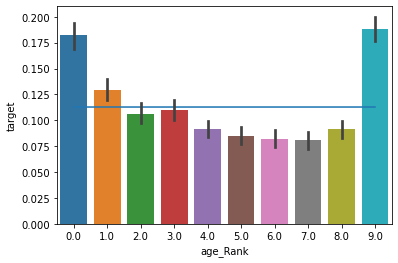

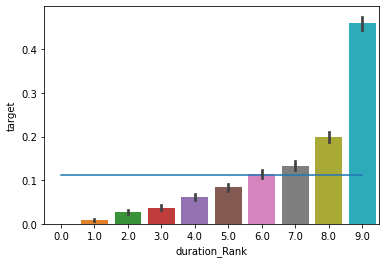

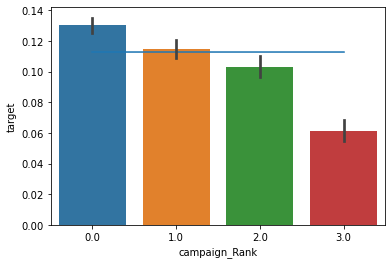

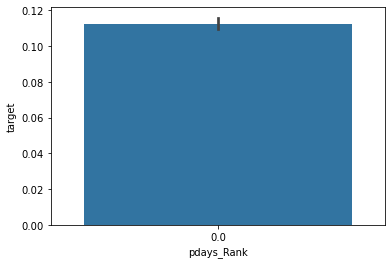

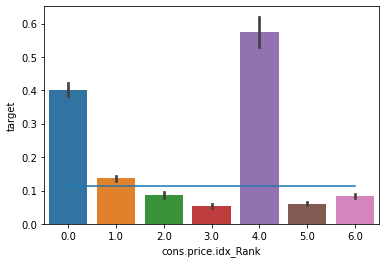

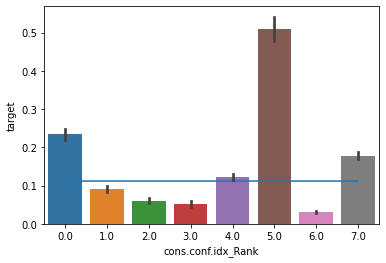

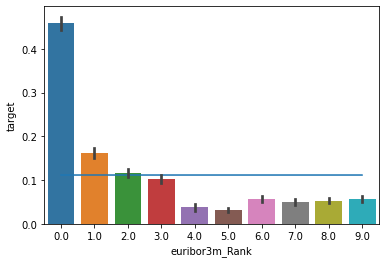

In [38]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor


X_bin_combined = pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_bin_combined['target'].mean(),data=X_bin_combined)
    sns.barplot(x=col, y="target",data=X_bin_combined, estimator=mean )
plt.show()

In [39]:
num_1=num_1.drop(['age','pdays'],axis=1)   #"age" follows U curve, anything which follows U curve is not good predictor
                                           #since they are not varying that much from population average

In [40]:
# All features from num_1 will get selected due to good discrimination power by all of them
select_features_df_num = num_1

In [41]:
select_features_df_num.shape

(41188, 5)

# Feature Selection - Categorical Features 

# Part 1 - Bi Variate Analysis

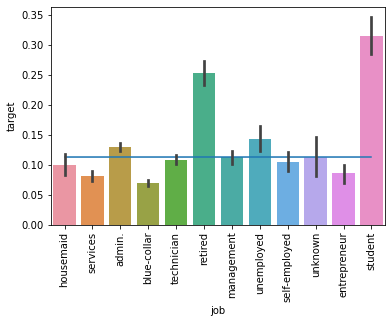

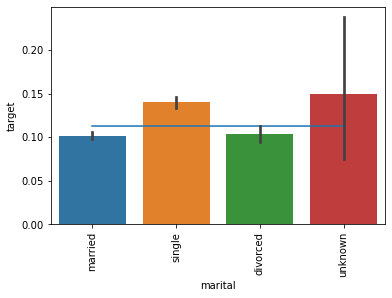

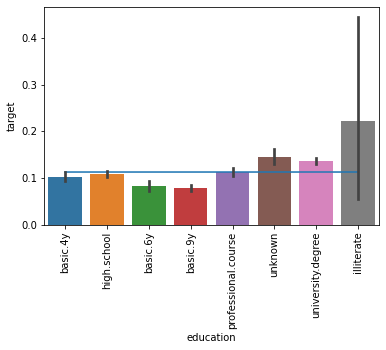

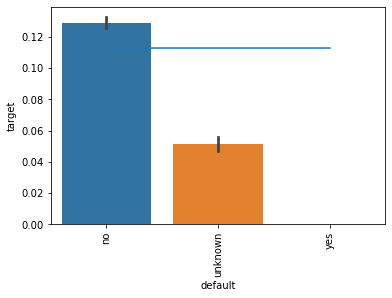

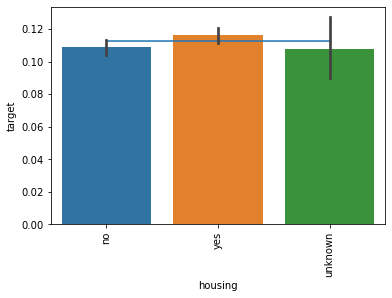

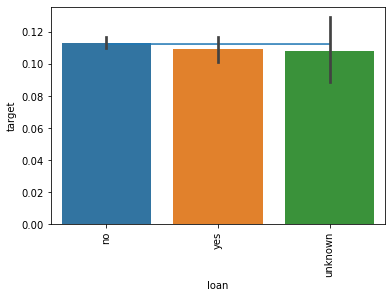

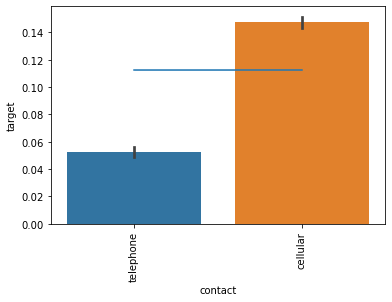

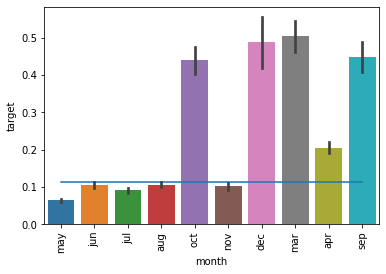

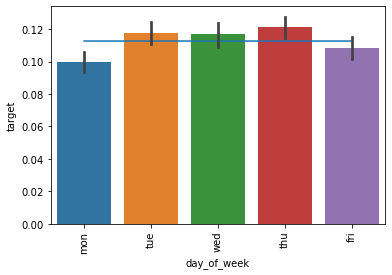

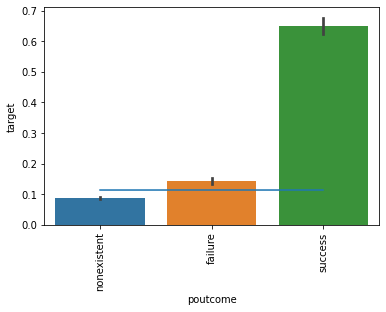

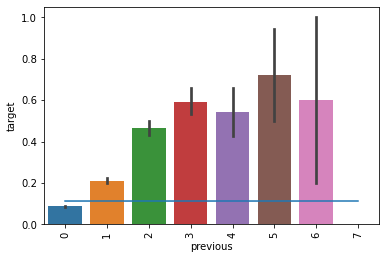

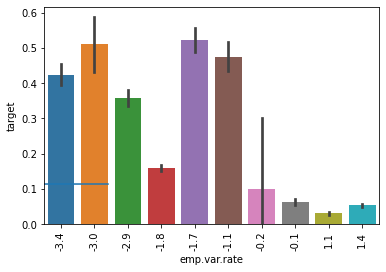

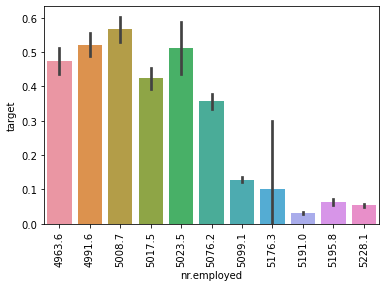

In [42]:
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    plt.tick_params(axis='x', which='major', labelsize=10, labelrotation = 90)
    sns.lineplot(x=col,y=X_char_merged['target'].mean(),data=X_char_merged)
    sns.barplot(x=col, y="target",data=X_char_merged, estimator=mean )
plt.show()

Insights:
  - "Marital","housing","loan", "day_of_week" feature can be dropped since its not a major discriminator
  - "education" can also be dropped because only illiterate is responding 20% to term deposit and rest category are almost constant

In [43]:
char=char.drop(['housing','education','marital','loan','day_of_week'],axis=1)

In [44]:
char['default']=np.where(char['default'] =='unknown', 'yes', char['default']) #clubbing "yes" to "unknown"

In [46]:
char.head(10)

,job,default,contact,month,poutcome,previous,emp.var.rate,nr.employed
0,housemaid,no,telephone,may,nonexistent,0,1.1,5191.0
1,services,yes,telephone,may,nonexistent,0,1.1,5191.0
2,services,no,telephone,may,nonexistent,0,1.1,5191.0
3,admin.,no,telephone,may,nonexistent,0,1.1,5191.0
4,services,no,telephone,may,nonexistent,0,1.1,5191.0
5,services,yes,telephone,may,nonexistent,0,1.1,5191.0
6,admin.,no,telephone,may,nonexistent,0,1.1,5191.0
7,blue-collar,yes,telephone,may,nonexistent,0,1.1,5191.0
8,technician,no,telephone,may,nonexistent,0,1.1,5191.0
9,services,no,telephone,may,nonexistent,0,1.1,5191.0


In [48]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.head()

,previous,emp.var.rate,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,0,1.1,5191.0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,1.1,5191.0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,1.1,5191.0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,1.1,5191.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,1.1,5191.0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [49]:
X_char_dum.shape

(41188, 27)

# Part 2 - Select K Best

# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=25)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [50]:
select_features_df_char=X_char_dum

# Creating the Master Feature Set for Model Development

In [51]:
X_all=pd.concat([select_features_df_char,select_features_df_num],axis=1,join="inner")

In [52]:
X_all.shape # char(27) + num(5) = 32 features

(41188, 32)

# Train Test Split

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=10)

In [55]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (28831, 32)
Shape of Testing Data (12357, 32)
Response Rate in Training Data target    0.111616
dtype: float64
Response Rate in Testing Data target    0.115076
dtype: float64


# Model Building Step

In [56]:
# Trying Logistic regression bcoz it has slot of features with non linear behaviour
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [58]:
coeff_df=pd.DataFrame(X_all.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

#defination for me to understand
# """A regression coefficient describes the size and direction of the relationship
#    between a predictor and the response variable."""

,features,Coefficient Estimate
0,previous,0.182098
1,emp.var.rate,-0.179246
2,nr.employed,-0.009290
3,job_blue-collar,-0.234198
4,job_entrepreneur,-0.006147
5,job_housemaid,0.004064
6,job_management,-0.020188
7,job_retired,0.102658
8,job_self-employed,-0.012785
9,job_services,-0.107482


Logistic Regression is giving Counter Intuitive results(we thought month oct, dec, mar, sep 
will give higher coefficient estimate)

In [59]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [60]:
# Applying GridsearchCV to get best parameters

np.random.seed(60)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250]}
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist, n_jobs = 3)
tree_grid.fit(X_train,y_train)
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 6, 'min_samples_split': 150}


In [61]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=150)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=150, random_state=0)

In [74]:
# !pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=64e8439b7ca78988ab5ec21c937f4d804c935d1b72521c2a12b141dfdd7c6da2
  Stored in directory: c:\users\megha\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


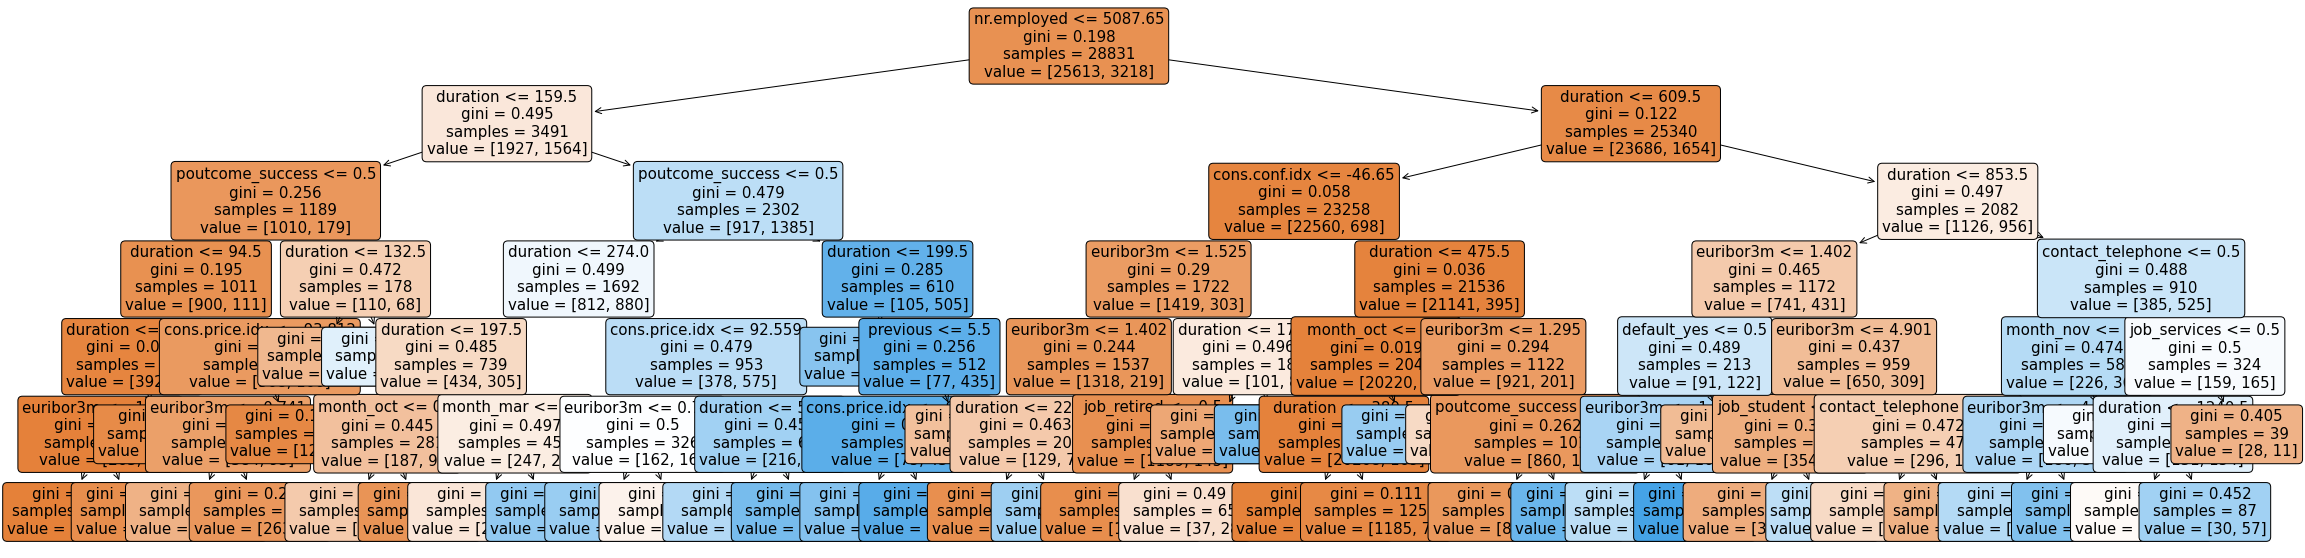

In [63]:
#printing Decision Tree
from sklearn import tree
import pydotplus
plt.figure(figsize=[40,10])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=X_all.columns)
plt.show()

In [64]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=150)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=150, random_state=0)

In [65]:
#checking feature importance
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
duration,0.318655
nr.employed,0.197881
euribor3m,0.141601
poutcome_success,0.100576
cons.conf.idx,0.055438
emp.var.rate,0.053722
cons.price.idx,0.042097
previous,0.018034
poutcome_nonexistent,0.011796
contact_telephone,0.011549


Here, Duration is the most important feature for our model

In [66]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=150)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=6, min_samples_split=150,
                           random_state=0)

In [67]:
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
duration,0.463211
nr.employed,0.293983
euribor3m,0.078543
poutcome_success,0.041596
cons.conf.idx,0.033233
month_oct,0.012814
campaign,0.011002
cons.price.idx,0.010122
previous,0.006298
contact_telephone,0.006027


Here also in case of GBM model, Duration is the most important feature for our model

In [ ]:
# For stacking purpose, takes some time
# base_learners = [
#                         ('rf', RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=500)),
#                         ('gbm', GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=500))  
#                        ] 

In [ ]:
# For importing Stacking Classifier
# from sklearn.ensemble import StackingClassifier
# clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

In [ ]:
# to fit above Stacking classifier
# clf.fit(X_train, y_train)

# Model Evaluation

In [68]:
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)
#y_pred_stacking=clf.predict(X_test)

In [69]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [70]:
#calculating matrix by logistic regression

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision:",metrics.precision_score(y_test,y_pred_logreg))
print("Recall:",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score:",metrics.f1_score(y_test,y_pred_logreg))  

Accuracy: 0.9056405276361577
Precision: 0.6422222222222222
Recall: 0.40646976090014064
f1_score: 0.49784668389319553


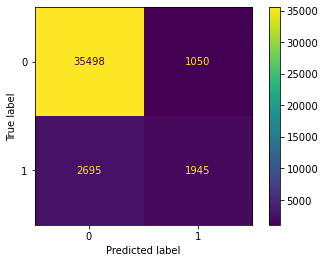

In [71]:
metrics.plot_confusion_matrix(logreg,X_all,Y)

Logistic Regression will not work accurately because linear relationship does not exist: 
Recall only 40% i.e. there are 2695 actual people who are interested in deposit but logistic regression cant capture

In [72]:
#calculating matrix by decision tree model

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.9131666262037711
Precision 0.6712463199214916
Recall 0.4810126582278481
f1_score 0.5604260548955347


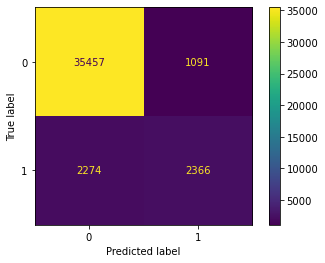

In [75]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [76]:
#calculating matrix by Random Forest model

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.9008659059642308
Precision 0.7274826789838337
Recall 0.22151898734177214
f1_score 0.33962264150943394


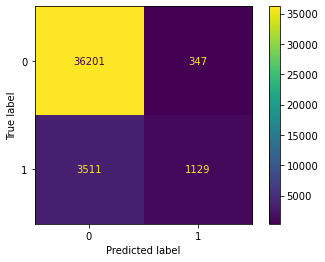

In [77]:
metrics.plot_confusion_matrix(rf,X_all,Y)

In [78]:
#calculating matrix by Gradient Boosting model

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.9117908877559278
Precision 0.6471631205673759
Recall 0.5133614627285513
f1_score 0.5725490196078431


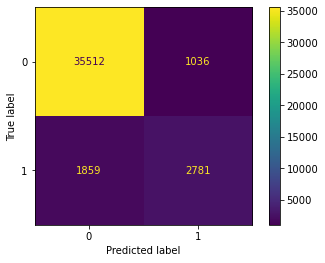

In [79]:
metrics.plot_confusion_matrix(gbm,X_all,Y)

In [ ]:
# Gains Chart Analysis
# This will help understand the power of discrimination offered by the model's estimated probabilities

## Logistic Regression - Gains Chart

In [80]:
y_pred_prob = logreg.predict_proba(X_all)[:, 1]
df['pred_prob_logreg']=pd.DataFrame(y_pred_prob)
df['P_Rank_logreg']=pd.qcut(df['pred_prob_logreg'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_logreg')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_logreg')['pred_prob_logreg'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_logreg',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_logreg,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4119,0.602573,0.640520,2482.0,2482.0,0.534914,0.534914,1637.0,1637.0,0.044790,0.044790,0.4901,0.100005,0.100005,1
1,9,4119,0.307356,0.240699,1266.0,3748.0,0.272845,0.807759,2853.0,4490.0,0.078062,0.122852,0.6849,0.100005,0.200010,2
2,8,4119,0.144938,0.097732,597.0,4345.0,0.128664,0.936422,3522.0,8012.0,0.096366,0.219219,0.7172,0.100005,0.300015,3
3,7,4118,0.043711,0.048957,180.0,4525.0,0.038793,0.975216,3938.0,11950.0,0.107749,0.326967,0.6482,0.099981,0.399995,4
4,6,4119,0.014809,0.029553,61.0,4586.0,0.013147,0.988362,4058.0,16008.0,0.111032,0.437999,0.5504,0.100005,0.500000,5
5,5,4119,0.007526,0.019949,31.0,4617.0,0.006681,0.995043,4088.0,20096.0,0.111853,0.549852,0.4452,0.100005,0.600005,6
6,4,4118,0.002914,0.014881,12.0,4629.0,0.002586,0.997629,4106.0,24202.0,0.112345,0.662198,0.3354,0.099981,0.699985,7
7,3,4119,0.001942,0.011449,8.0,4637.0,0.001724,0.999353,4111.0,28313.0,0.112482,0.774680,0.2247,0.100005,0.799990,8
8,2,4119,0.000728,0.008516,3.0,4640.0,0.000647,1.000000,4116.0,32429.0,0.112619,0.887299,0.1127,0.100005,0.899995,9
9,1,4119,0.000000,0.004373,0.0,4640.0,0.000000,1.000000,4119.0,36548.0,0.112701,1.000000,-0.0000,0.100005,1.000000,10


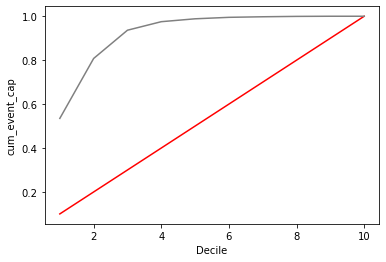

In [81]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

## Decision Tree - Gains Chart

In [83]:
y_pred_prob = dtree.predict_proba(X_all)[:, 1]
df['pred_prob_dtree']=pd.DataFrame(y_pred_prob)
df['P_Rank_tree']=pd.qcut(df['pred_prob_dtree'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_tree')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_tree')['pred_prob_dtree'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_tree',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_tree,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4119,0.652100,0.656379,2686.0,2686.0,0.578879,0.578879,1433.0,1433.0,0.039209,0.039209,0.5397,0.100005,0.100005,1
1,9,4119,0.318767,0.306158,1313.0,3999.0,0.282974,0.861853,2806.0,4239.0,0.076776,0.115984,0.7459,0.100005,0.200010,2
2,8,4119,0.109250,0.099171,450.0,4449.0,0.096983,0.958836,3669.0,7908.0,0.100389,0.216373,0.7425,0.100005,0.300015,3
3,7,4118,0.025741,0.019970,106.0,4555.0,0.022845,0.981681,4012.0,11920.0,0.109773,0.326146,0.6555,0.099981,0.399995,4
4,6,4119,0.009468,0.004969,39.0,4594.0,0.008405,0.990086,4080.0,16000.0,0.111634,0.437780,0.5523,0.100005,0.500000,5
5,5,4119,0.006069,0.004969,25.0,4619.0,0.005388,0.995474,4094.0,20094.0,0.112017,0.549798,0.4457,0.100005,0.600005,6
6,4,4118,0.002671,0.004969,11.0,4630.0,0.002371,0.997845,4107.0,24201.0,0.112373,0.662170,0.3357,0.099981,0.699985,7
7,3,4119,0.001214,0.004969,5.0,4635.0,0.001078,0.998922,4114.0,28315.0,0.112564,0.774735,0.2242,0.100005,0.799990,8
8,2,4119,0.000486,0.004969,2.0,4637.0,0.000431,0.999353,4117.0,32432.0,0.112646,0.887381,0.1120,0.100005,0.899995,9
9,1,4119,0.000728,0.004536,3.0,4640.0,0.000647,1.000000,4116.0,36548.0,0.112619,1.000000,-0.0000,0.100005,1.000000,10


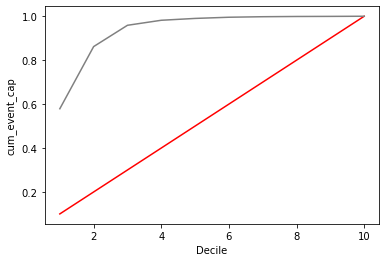

In [84]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

## Random Forest Lorenz Curve

In [86]:
y_pred_prob = rf.predict_proba(X_all)[:, 1]
df['pred_prob_rf']=pd.DataFrame(y_pred_prob)
df['P_Rank_rf']=pd.qcut(df['pred_prob_rf'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_rf')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_rf')['pred_prob_rf'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_rf',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_rf,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4119,0.589221,0.485946,2427.0,2427.0,0.523060,0.523060,1692.0,1692.0,0.046295,0.046295,0.4768,0.100005,0.100005,1
1,9,4119,0.342073,0.283831,1409.0,3836.0,0.303664,0.826724,2710.0,4402.0,0.074149,0.120444,0.7063,0.100005,0.200010,2
2,8,4119,0.142753,0.129202,588.0,4424.0,0.126724,0.953448,3531.0,7933.0,0.096613,0.217057,0.7364,0.100005,0.300015,3
3,7,4118,0.022341,0.062173,92.0,4516.0,0.019828,0.973276,4026.0,11959.0,0.110157,0.327214,0.6461,0.099981,0.399995,4
4,6,4119,0.019422,0.035022,80.0,4596.0,0.017241,0.990517,4039.0,15998.0,0.110512,0.437726,0.5528,0.100005,0.500000,5
5,5,4119,0.003884,0.030063,16.0,4612.0,0.003448,0.993966,4103.0,20101.0,0.112263,0.549989,0.4440,0.100005,0.600005,6
6,4,4118,0.002914,0.028409,12.0,4624.0,0.002586,0.996552,4106.0,24207.0,0.112345,0.662334,0.3342,0.099981,0.699985,7
7,3,4119,0.003156,0.023902,13.0,4637.0,0.002802,0.999353,4106.0,28313.0,0.112345,0.774680,0.2247,0.100005,0.799990,8
8,2,4119,0.000486,0.019468,2.0,4639.0,0.000431,0.999784,4117.0,32430.0,0.112646,0.887326,0.1125,0.100005,0.899995,9
9,1,4119,0.000243,0.017539,1.0,4640.0,0.000216,1.000000,4118.0,36548.0,0.112674,1.000000,0.0000,0.100005,1.000000,10


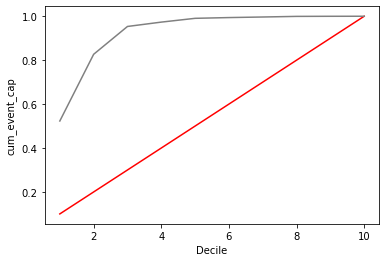

In [87]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

## Gradient boosting Lorenz Curve

In [88]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]
df['pred_prob_gbm']=pd.DataFrame(y_pred_prob)
df['P_Rank_GBM']=pd.qcut(df['pred_prob_gbm'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_GBM')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_GBM')['pred_prob_gbm'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_GBM',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_GBM,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4119,0.709395,0.676627,2922.0,2922.0,0.629741,0.629741,1197.0,1197.0,0.032751,0.032751,0.5970,0.100005,0.100005,1
1,9,4119,0.304686,0.309131,1255.0,4177.0,0.270474,0.900216,2864.0,4061.0,0.078363,0.111114,0.7891,0.100005,0.200010,2
2,8,4119,0.089099,0.087218,367.0,4544.0,0.079095,0.979310,3752.0,7813.0,0.102660,0.213774,0.7655,0.100005,0.300015,3
3,7,4118,0.019427,0.018770,80.0,4624.0,0.017241,0.996552,4038.0,11851.0,0.110485,0.324259,0.6723,0.099981,0.399995,4
4,6,4119,0.001942,0.007133,8.0,4632.0,0.001724,0.998276,4111.0,15962.0,0.112482,0.436741,0.5615,0.100005,0.500000,5
5,5,4119,0.001214,0.003865,5.0,4637.0,0.001078,0.999353,4114.0,20076.0,0.112564,0.549305,0.4500,0.100005,0.600005,6
6,4,4118,0.000486,0.002697,2.0,4639.0,0.000431,0.999784,4116.0,24192.0,0.112619,0.661924,0.3379,0.099981,0.699985,7
7,3,4119,0.000243,0.002367,1.0,4640.0,0.000216,1.000000,4118.0,28310.0,0.112674,0.774598,0.2254,0.100005,0.799990,8
8,2,4119,0.000000,0.002070,0.0,4640.0,0.000000,1.000000,4119.0,32429.0,0.112701,0.887299,0.1127,0.100005,0.899995,9
9,1,4119,0.000000,0.001370,0.0,4640.0,0.000000,1.000000,4119.0,36548.0,0.112701,1.000000,0.0000,0.100005,1.000000,10


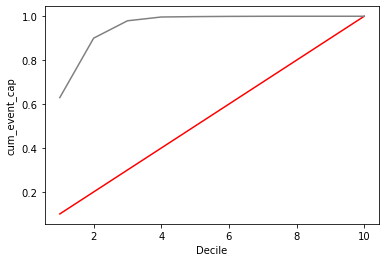

In [89]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

In [ ]:
# Project Conclusion :- 
# The GBM Model has performed the best and hence will be used for Customer targeting with retention offers in Telecom

In [90]:
# creating target zones 
df['Predicted_Response_Rank']=np.where(df['P_Rank_GBM']>8,"Top 2","Bottom 8")

In [91]:
df.groupby('Predicted_Response_Rank')['target'].agg(['mean'])

,mean
Predicted_Response_Rank,
Bottom 8,0.014052
Top 2,0.507041


In [92]:
df['Duration_Rank']=pd.qcut(df['duration'].rank(method='first').values,10,duplicates='drop').codes+1

In [93]:
df.groupby('Duration_Rank')['duration'].agg(['min','mean','max'])

,min,mean,max
Duration_Rank,,,
1,0,34.379947,59
2,59,74.382617,89
3,89,102.283321,116
4,116,130.867654,146
5,146,162.387958,180
6,180,199.750182,222
7,222,248.925692,280
8,280,320.676863,368
9,368,445.551833,551


In [94]:
df['duration'].mean()

258.2850101971448

In [96]:
#Giving Telemarketing team priority list to call

df['duration_segment']=np.where(df['Duration_Rank']>7,"High Duration","Low Duration")
df.duration_segment.value_counts()

Low Duration     28831
High Duration    12357
Name: duration_segment, dtype: int64

In [97]:
# Number of customers in each category

pd.crosstab(index=df['duration_segment'], columns=df['Predicted_Response_Rank'],values=df['Predicted_Response_Rank'],aggfunc='count')

Predicted_Response_Rank,Bottom 8,Top 2
duration_segment,,
High Duration,6491,5866
Low Duration,26459,2372


In [ ]:
###### Recommendations ##########
# Phase 1 - Speak to customers who falls in top 2 predicted ranks(deciles) and also are in High Duration segment
# Similarly - Phase 2 ( Top 2 , Low Duration)
# Phase 3 - Bottom 8 and High Duration (randomly select 25% of them only)